In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Reading the excel file

In [2]:
dfs = pd.read_excel('Data.xlsx', sheet_name=None)

Accessing the sheetnames and creating dataframes out of them

In [3]:
dfs.keys()

dict_keys(['Game', 'Deposit', 'Withdraw'])

In [4]:
game = dfs['Game']
deposit = dfs['Deposit']
withdraw = dfs['Withdraw']

# Game df

In [5]:
game.head()

,User ID,Games Played,Datetime
0,851,1,2022-01-10 00:00:00
1,717,1,2022-01-10 00:00:00
2,456,1,2022-01-10 00:00:00
3,424,1,2022-01-10 00:00:00
4,845,1,2022-01-10 00:00:00


In [6]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User ID       355266 non-null  int64 
 1   Games Played  355266 non-null  int64 
 2   Datetime      355266 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


Processing to create Slots out them

In [7]:
game['Datetime'] = pd.to_datetime(game['Datetime'])
game['Slot'] = np.where(game['Datetime'].dt.hour >= 12, 'S2', 'S1')

In [8]:
game.head()

,User ID,Games Played,Datetime,Slot
0,851,1,2022-01-10,S1
1,717,1,2022-01-10,S1
2,456,1,2022-01-10,S1
3,424,1,2022-01-10,S1
4,845,1,2022-01-10,S1


Dropping columns which are of no use

In [9]:
game = game.drop(columns = ['Datetime'])

In [10]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User ID       355266 non-null  int64 
 1   Games Played  355266 non-null  int64 
 2   Slot          355266 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


Creating slot wise dataframes

In [11]:
gameS1 = game[game['Slot'] == 'S1']
grouped_game_S1 = gameS1.groupby('User ID')['Games Played'].sum().reset_index()
print(grouped_game_S1)

     User ID  Games Played
0          0             8
1          1             3
2          2            46
3          3            44
4          4             3
..       ...           ...
954      995             7
955      996           231
956      997            57
957      998             3
958      999            84

[959 rows x 2 columns]


In [12]:
gameS2 = game[game['Slot'] == 'S2']
grouped_game_S2 = gameS2.groupby('User ID')['Games Played'].sum().reset_index()
print(grouped_game_S2)

     User ID  Games Played
0          0             7
1          1             5
2          2            51
3          3            36
4          4             2
..       ...           ...
964      995            11
965      996           243
966      997            52
967      998             1
968      999            90

[969 rows x 2 columns]


merging slot wise data to one and users which have both slots, will have both as slot

In [13]:
combinedgame = pd.merge(grouped_game_S1, grouped_game_S2, on='User ID', how='outer', suffixes=('_S1', '_S2'))

combinedgame['Games Played_S1'] = combinedgame['Games Played_S1'].fillna(0)
combinedgame['Games Played_S2'] = combinedgame['Games Played_S2'].fillna(0)

combinedgame['Games Played'] = combinedgame['Games Played_S1'] + combinedgame['Games Played_S2']

combinedgame['Slot'] = combinedgame.apply(
    lambda x: 'Both' if x['Games Played_S1'] > 0 and x['Games Played_S2'] > 0 
    else ('S1 Only' if x['Games Played_S1'] > 0 else 'S2 Only'), axis=1
)

resultgame = combinedgame[['User ID', 'Games Played', 'Slot']]

print(resultgame)

     User ID  Games Played  Slot
0          0          15.0  Both
1          1           8.0  Both
2          2          97.0  Both
3          3          80.0  Both
4          4           5.0  Both
..       ...           ...   ...
995      995          18.0  Both
996      996         474.0  Both
997      997         109.0  Both
998      998           4.0  Both
999      999         174.0  Both

[1000 rows x 3 columns]


# Deposit df

In [14]:
deposit.head()

,User Id,Datetime,Amount
0,357,2022-01-10 00:03:00,2000
1,776,2022-01-10 00:03:00,2500
2,492,2022-01-10 00:06:00,5000
3,803,2022-01-10 00:07:00,5000
4,875,2022-01-10 00:09:00,1500


Keeping just columns which are of use

In [16]:
deposit = deposit.drop(columns = ['Datetime'])

In [17]:
deposit.head()

,User Id,Amount
0,357,2000
1,776,2500
2,492,5000
3,803,5000
4,875,1500


Adding the amounts on the basis of users

In [18]:
deposit_value = deposit.groupby('User Id')['Amount'].sum().reset_index()
print(deposit_value)

     User Id  Amount
0          1    5000
1          2  567000
2          3   40000
3          4    1750
4          5   74100
..       ...     ...
910      994    1400
911      995   34500
912      996   96400
913      998    7400
914      999    9000

[915 rows x 2 columns]


# Withdraw df

In [19]:
withdraw.head()

,User Id,Datetime,Amount
0,190,2022-01-10 00:03:00,5872
1,159,2022-01-10 00:16:00,9540
2,164,2022-01-10 00:24:00,815
3,946,2022-01-10 00:29:00,23000
4,763,2022-01-10 00:40:00,9473


Keeping only those columns which are of use

In [20]:
withdraw = withdraw.drop(columns = ['Datetime'])

In [21]:
withdraw.head()

,User Id,Amount
0,190,5872
1,159,9540
2,164,815
3,946,23000
4,763,9473


Adding withrawal money according to the users

In [22]:
withdraw_value = withdraw.groupby('User Id')['Amount'].sum().reset_index()
print(withdraw_value)

     User Id   Amount
0          2  1270215
1          5    32700
2          7     6617
3          9   171456
4         11   101500
..       ...      ...
509      980    87900
510      985   155000
511      987   135650
512      989  1339000
513      992   616278

[514 rows x 2 columns]


# MERGING

In [25]:
merged_1 = pd.merge(
    combinedgame, deposit_value, 
    left_on='User ID', right_on='User Id', 
    how='outer'
).drop('User Id', axis=1)

final = pd.merge(
    merged_1, withdraw_value, 
    left_on='User ID', right_on='User Id', 
    how='outer'
).drop('User Id', axis=1)

print(final)

     User ID  Games Played_S1  Games Played_S2  Games Played  Slot  Amount_x  \
0          0              8.0              7.0          15.0  Both       NaN   
1          1              3.0              5.0           8.0  Both    5000.0   
2          2             46.0             51.0          97.0  Both  567000.0   
3          3             44.0             36.0          80.0  Both   40000.0   
4          4              3.0              2.0           5.0  Both    1750.0   
..       ...              ...              ...           ...   ...       ...   
995      995              7.0             11.0          18.0  Both   34500.0   
996      996            231.0            243.0         474.0  Both   96400.0   
997      997             57.0             52.0         109.0  Both       NaN   
998      998              3.0              1.0           4.0  Both    7400.0   
999      999             84.0             90.0         174.0  Both    9000.0   

      Amount_y  
0          NaN  
1    

In [27]:
final.drop(columns=['Games Played_S1', 'Games Played_S2'], inplace=True)

Changing column names according to our need

In [29]:
final.rename(columns={'Amount_x': 'Deposit'}, inplace=True)
final.rename(columns={'Amount_y': 'Withdraw'}, inplace=True)

In [31]:
print(final)

     User ID  Games Played  Slot   Deposit   Withdraw
0          0          15.0  Both       NaN        NaN
1          1           8.0  Both    5000.0        NaN
2          2          97.0  Both  567000.0  1270215.0
3          3          80.0  Both   40000.0        NaN
4          4           5.0  Both    1750.0        NaN
..       ...           ...   ...       ...        ...
995      995          18.0  Both   34500.0        NaN
996      996         474.0  Both   96400.0        NaN
997      997         109.0  Both       NaN        NaN
998      998           4.0  Both    7400.0        NaN
999      999         174.0  Both    9000.0        NaN

[1000 rows x 5 columns]


In [33]:
final = final.fillna(0)

Calculating Loyalty Points

In [35]:
final ['LoyaltyPoint'] = (0.01 * final['Deposit']) + (0.005 * final['Withdraw']) + 0.001 * final[['Deposit', 'Withdraw']].apply(
    lambda x: max(x['Deposit'] - x['Withdraw'], 0), axis=1
) + (0.2 * final['Games Played'])

In [70]:
final.head()

,User ID,Games Played,Slot,Deposit,Withdraw,LoyaltyPoint
0,0,15.0,Both,0.0,0.0,3.000
1,1,8.0,Both,5000.0,0.0,56.600
2,2,97.0,Both,567000.0,1270215.0,12040.475
3,3,80.0,Both,40000.0,0.0,456.000
4,4,5.0,Both,1750.0,0.0,20.250


Calculating Top 50 among them

In [39]:
top50 = final.sort_values(by='LoyaltyPoint', ascending=False).head(50)

In [41]:
top50

,User ID,Games Played,Slot,Deposit,Withdraw,LoyaltyPoint
634,634,24.0,Both,515000.0,15737705.0,83843.325
672,672,10.0,Both,2158700.0,233750.0,24682.700
99,99,10.0,Both,1164800.0,2403141.0,23665.705
212,212,1.0,S2 Only,1924981.0,589850.0,23534.391
566,566,183.0,Both,1819175.0,185071.0,20787.809
740,740,2.0,S2 Only,1738490.0,365288.0,20584.942
714,714,6.0,Both,1676300.0,0.0,18440.500
421,421,1557.0,Both,878600.0,1269809.0,15446.445
30,30,13.0,Both,1329000.0,152145.0,15230.180
222,222,10.0,Both,1285000.0,99358.0,14534.432


In [43]:
le = LabelEncoder()
top50['Slot_encoded'] = le.fit_transform(top50['Slot'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Both': 0, 'S1 Only': 1, 'S2 Only': 2}


In [45]:
list1 = top50['Slot']

In [47]:
top50 = top50.drop(columns = 'Slot')

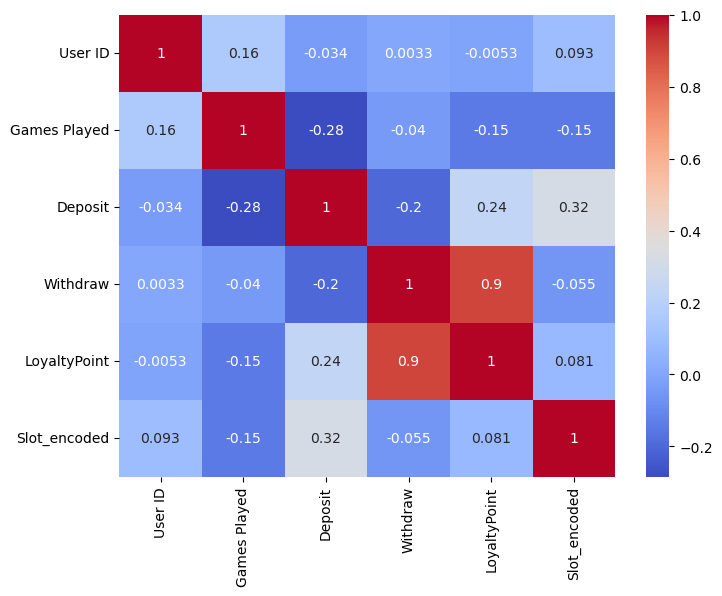

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(top50.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of Bonus among top 50 users of the game

In [77]:
top50['Bonus'] = (top50['LoyaltyPoint'] / top50['LoyaltyPoint'].sum()) * 50000

In [79]:
top50

,User ID,Games Played,Deposit,Withdraw,LoyaltyPoint,Slot_encoded,Bonus
634,634,24.0,515000.0,15737705.0,83843.325,0,6399.796285
672,672,10.0,2158700.0,233750.0,24682.700,0,1884.040879
99,99,10.0,1164800.0,2403141.0,23665.705,0,1806.413223
212,212,1.0,1924981.0,589850.0,23534.391,2,1796.389970
566,566,183.0,1819175.0,185071.0,20787.809,0,1586.742210
740,740,2.0,1738490.0,365288.0,20584.942,2,1571.257287
714,714,6.0,1676300.0,0.0,18440.500,0,1407.571126
421,421,1557.0,878600.0,1269809.0,15446.445,0,1179.033648
30,30,13.0,1329000.0,152145.0,15230.180,0,1162.526049
222,222,10.0,1285000.0,99358.0,14534.432,0,1109.419312


In [83]:
top50['Bonus'].sum()

50000.000000000015

The loyalty point doesn't take number of games played into consideration that much, as it gives to withdrawal money.  